<a href="https://colab.research.google.com/github/Onedory/UROP_colorize_method/blob/main/1.%20%EC%83%89%EC%B9%A0%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


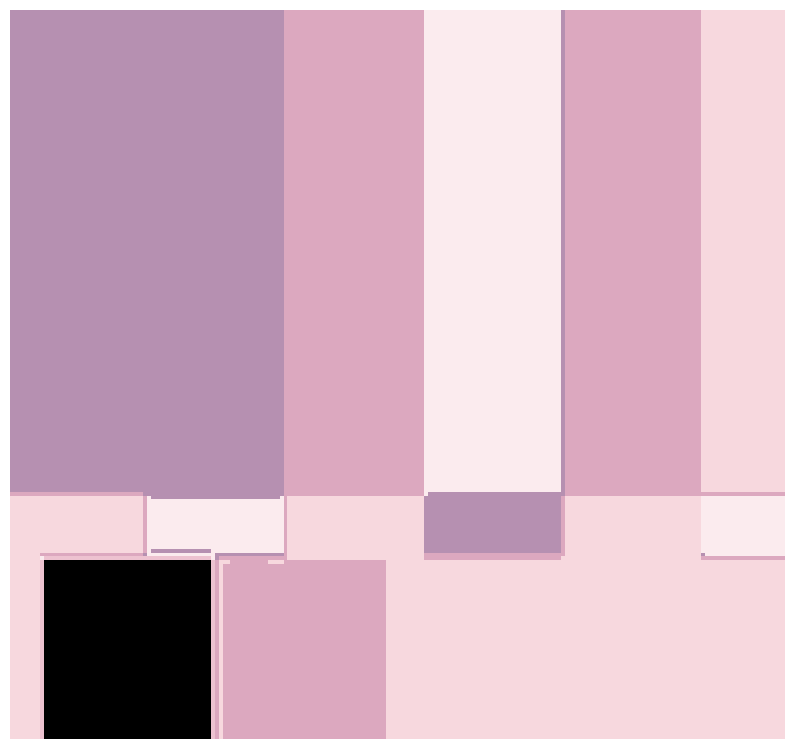

Colorized image saved to /content/drive/MyDrive/UROP/colorized_image.png


In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 이미지 경로 설정
gray_image_path = '/content/drive/MyDrive/UROP/gray.png'
reference_image_path = '/content/drive/MyDrive/UROP/pink.png'

# 이미지 로드
gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)
reference_image = cv2.imread(reference_image_path)

# 이미지가 정상적으로 로드되었는지 확인
if gray_image is None:
    print(f"Error loading image from {gray_image_path}. Check the file path and ensure the image exists.")
if reference_image is None:
    print(f"Error loading image from {reference_image_path}. Check the file path and ensure the image exists.")

# 이미지에서 주요 색상을 추출하는 함수
def extract_dominant_colors(image, k=5):
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_
    return colors

# 참조 이미지에서 주요 색상 추출
if reference_image is not None:
    dominant_colors = extract_dominant_colors(reference_image, k=5)

# 그레이스케일 이미지를 색칠하는 함수
def colorize_image(gray_image, colors):
    h, w = gray_image.shape
    colorized_image = np.zeros((h, w, 3), dtype=np.uint8)
    steps = 256 // len(colors)

    for i in range(len(colors)):
        mask = cv2.inRange(gray_image, i*steps, (i+1)*steps - 1)
        colorized_image[mask > 0] = colors[i]

    return colorized_image

# 그레이스케일 이미지를 색칠
if gray_image is not None and reference_image is not None:
    colorized_image = colorize_image(gray_image, dominant_colors)

    # matplotlib으로 표시하기 위해 BGR을 RGB로 변환
    colorized_image_rgb = cv2.cvtColor(colorized_image, cv2.COLOR_BGR2RGB)

    # 색칠된 이미지 표시
    plt.figure(figsize=(10, 10))
    plt.imshow(colorized_image_rgb)
    plt.axis('off')
    plt.show()

    # 색칠된 이미지 저장
    colorized_image_path = '/content/drive/MyDrive/UROP/colorized_image.png'
    cv2.imwrite(colorized_image_path, colorized_image)
    print(f"Colorized image saved to {colorized_image_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


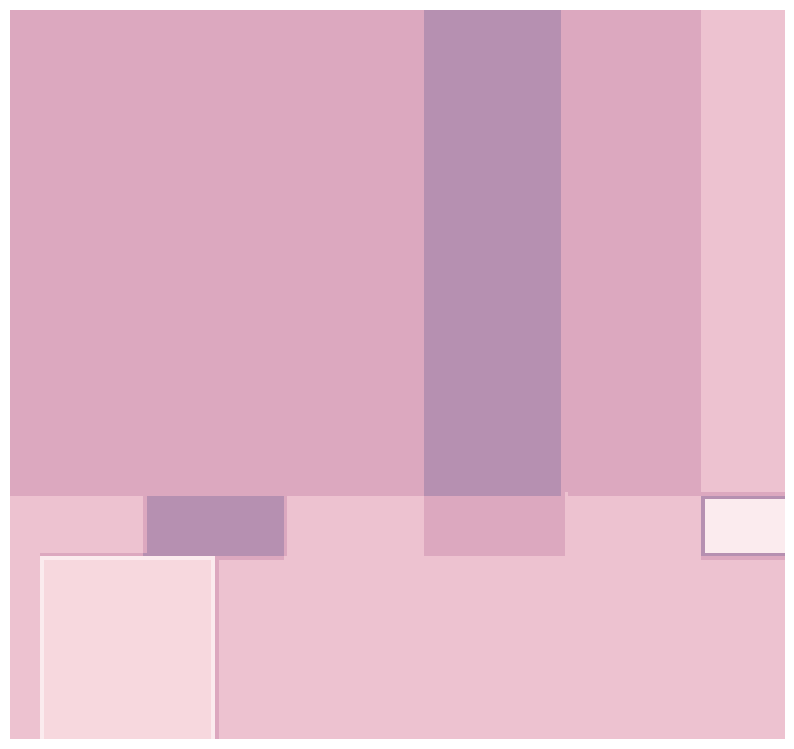

Colorized image saved to /content/drive/MyDrive/UROP/colorized_image.png


In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 이미지 경로 설정
gray_image_path = '/content/drive/MyDrive/UROP/gray.png'
reference_image_path = '/content/drive/MyDrive/UROP/pink.png'

# 이미지 로드
gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)
reference_image = cv2.imread(reference_image_path)

# 이미지가 정상적으로 로드되었는지 확인
if gray_image is None:
    print(f"Error loading image from {gray_image_path}. Check the file path and ensure the image exists.")
if reference_image is None:
    print(f"Error loading image from {reference_image_path}. Check the file path and ensure the image exists.")

# 이미지에서 주요 색상을 추출하는 함수
def extract_dominant_colors(image, k=5):
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_
    return colors

# 참조 이미지에서 주요 색상 추출
if reference_image is not None:
    dominant_colors = extract_dominant_colors(reference_image, k=5)

# 그레이스케일 이미지를 색칠하는 함수
def colorize_image(gray_image, colors):
    h, w = gray_image.shape
    colorized_image = np.zeros((h, w, 3), dtype=np.uint8)

    # 각 픽셀에 대해 가장 가까운 색상을 찾음
    for i in range(h):
        for j in range(w):
            pixel_value = gray_image[i, j]
            color_index = int(pixel_value * (len(colors) - 1) / 255)
            colorized_image[i, j] = colors[color_index]

    return colorized_image

# 그레이스케일 이미지를 색칠
if gray_image is not None and reference_image is not None:
    colorized_image = colorize_image(gray_image, dominant_colors)

    # matplotlib으로 표시하기 위해 BGR을 RGB로 변환
    colorized_image_rgb = cv2.cvtColor(colorized_image, cv2.COLOR_BGR2RGB)

    # 색칠된 이미지 표시
    plt.figure(figsize=(10, 10))
    plt.imshow(colorized_image_rgb)
    plt.axis('off')
    plt.show()

    # 색칠된 이미지 저장
    colorized_image_path = '/content/drive/MyDrive/UROP/colorized_image.png'
    cv2.imwrite(colorized_image_path, colorized_image)
    print(f"Colorized image saved to {colorized_image_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


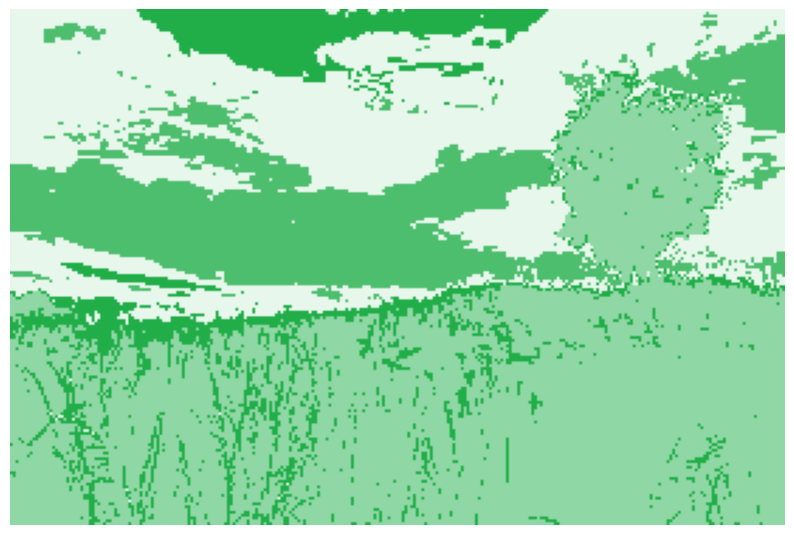

Colorized image saved to /content/drive/MyDrive/UROP/colorized_image2.png


In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 이미지 경로 설정
gray_image_path = '/content/drive/MyDrive/UROP/gray2.jpeg'
reference_image_path = '/content/drive/MyDrive/UROP/green.png'

# 이미지 로드
gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)
reference_image = cv2.imread(reference_image_path)

# 이미지가 정상적으로 로드되었는지 확인
if gray_image is None:
    print(f"Error loading image from {gray_image_path}. Check the file path and ensure the image exists.")
if reference_image is None:
    print(f"Error loading image from {reference_image_path}. Check the file path and ensure the image exists.")

# 이미지에서 주요 색상을 추출하는 함수
def extract_dominant_colors(image, k=5):
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_
    return colors

# 참조 이미지에서 주요 색상 추출
if reference_image is not None:
    dominant_colors = extract_dominant_colors(reference_image, k=5)

# 그레이스케일 이미지를 색칠하는 함수
def colorize_image(gray_image, colors):
    h, w = gray_image.shape
    colorized_image = np.zeros((h, w, 3), dtype=np.uint8)

    # 각 픽셀에 대해 가장 가까운 색상을 찾음
    for i in range(h):
        for j in range(w):
            pixel_value = gray_image[i, j]
            color_index = int(pixel_value * (len(colors) - 1) / 255)
            colorized_image[i, j] = colors[color_index]

    return colorized_image

# 그레이스케일 이미지를 색칠
if gray_image is not None and reference_image is not None:
    colorized_image = colorize_image(gray_image, dominant_colors)

    # matplotlib으로 표시하기 위해 BGR을 RGB로 변환
    colorized_image_rgb = cv2.cvtColor(colorized_image, cv2.COLOR_BGR2RGB)

    # 색칠된 이미지 표시
    plt.figure(figsize=(10, 10))
    plt.imshow(colorized_image_rgb)
    plt.axis('off')
    plt.show()

    # 색칠된 이미지 저장
    colorized_image_path = '/content/drive/MyDrive/UROP/colorized_image2.png'
    cv2.imwrite(colorized_image_path, colorized_image)
    print(f"Colorized image saved to {colorized_image_path}")


# 색깔 유사도 평가하기

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


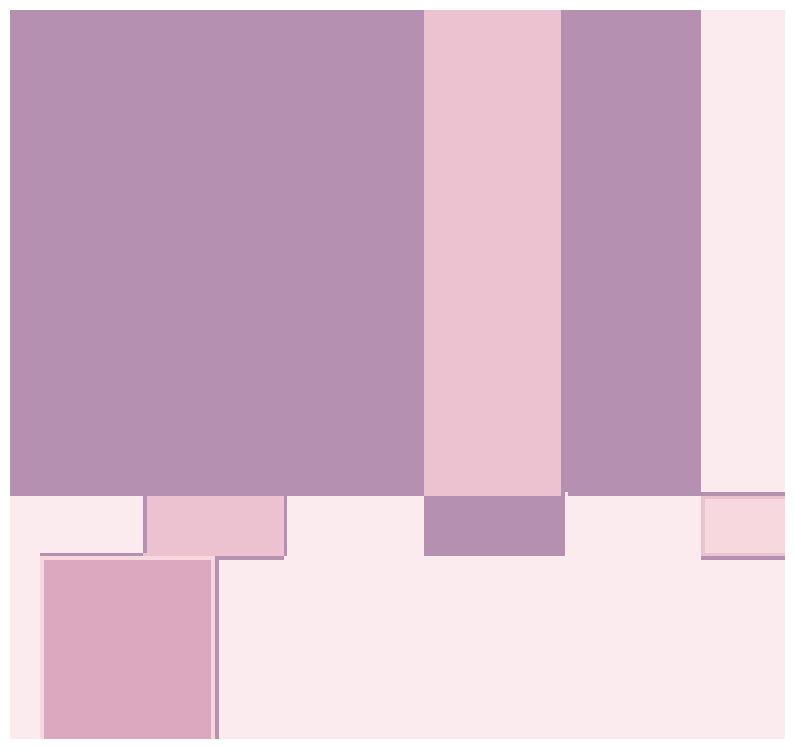

Colorized image saved to /content/drive/MyDrive/UROP/colorized_image.png
Chi-Square distance: 8.0
Correlation: 0.4560424966799469
Intersection: 7.0
Bhattacharyya distance: 0.7302967433402214


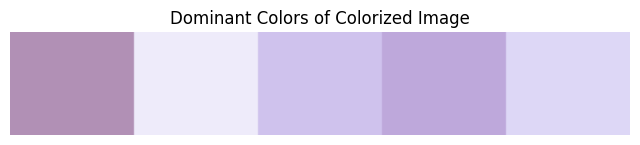

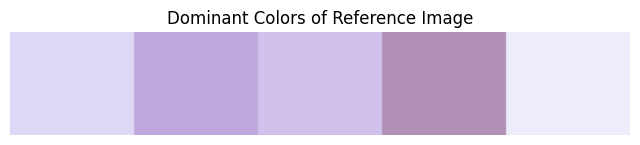

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 이미지 경로 설정
gray_image_path = '/content/drive/MyDrive/UROP/gray.png'
reference_image_path = '/content/drive/MyDrive/UROP/pink.png'

# 이미지 로드
gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)
reference_image = cv2.imread(reference_image_path)

# 이미지가 정상적으로 로드되었는지 확인
if gray_image is None:
    print(f"Error loading image from {gray_image_path}. Check the file path and ensure the image exists.")
if reference_image is None:
    print(f"Error loading image from {reference_image_path}. Check the file path and ensure the image exists.")

# 이미지에서 주요 색상을 추출하는 함수
def extract_dominant_colors(image, k=5):
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_
    return colors

# 참조 이미지에서 주요 색상 추출
if reference_image is not None:
    dominant_colors = extract_dominant_colors(reference_image, k=5)

# 그레이스케일 이미지를 색칠하는 함수
def colorize_image(gray_image, colors):
    h, w = gray_image.shape
    colorized_image = np.zeros((h, w, 3), dtype=np.uint8)

    # 각 픽셀에 대해 가장 가까운 색상을 찾음
    for i in range(h):
        for j in range(w):
            pixel_value = gray_image[i, j]
            color_index = int(pixel_value * (len(colors) - 1) / 255)
            colorized_image[i, j] = colors[color_index]

    return colorized_image

# 그레이스케일 이미지를 색칠
if gray_image is not None and reference_image is not None:
    colorized_image = colorize_image(gray_image, dominant_colors)

    # matplotlib으로 표시하기 위해 BGR을 RGB로 변환
    colorized_image_rgb = cv2.cvtColor(colorized_image, cv2.COLOR_BGR2RGB)

    # 색칠된 이미지 표시
    plt.figure(figsize=(10, 10))
    plt.imshow(colorized_image_rgb)
    plt.axis('off')
    plt.show()

    # 색칠된 이미지 저장
    colorized_image_path = '/content/drive/MyDrive/UROP/colorized_image.png'
    cv2.imwrite(colorized_image_path, colorized_image)
    print(f"Colorized image saved to {colorized_image_path}")

# 색칠된 이미지와 참조 이미지의 주요 색상 비교
colorized_image = cv2.imread(colorized_image_path)

# 주요 색상 히스토그램 계산 함수
def calculate_histogram(colors):
    hist = np.zeros((256, 3), dtype=np.float32)
    for color in colors:
        for i in range(3):
            intensity = int(color[i])
            hist[intensity, i] += 1
    return hist

# 주요 색상 추출
dominant_colors_colorized = extract_dominant_colors(colorized_image, k=5)
dominant_colors_reference = extract_dominant_colors(reference_image, k=5)

# 주요 색상 히스토그램 계산
hist_colorized = calculate_histogram(dominant_colors_colorized)
hist_reference = calculate_histogram(dominant_colors_reference)

# 히스토그램 비교 함수
def compare_histograms(hist1, hist2):
    chi_square = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    correlation = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    intersection = cv2.compareHist(hist1, hist2, cv2.HISTCMP_INTERSECT)
    bhattacharyya = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)
    return chi_square, correlation, intersection, bhattacharyya

# 히스토그램 비교
chi_square, correlation, intersection, bhattacharyya = compare_histograms(hist_colorized, hist_reference)

print(f"Chi-Square distance: {chi_square}")
print(f"Correlation: {correlation}")
print(f"Intersection: {intersection}")
print(f"Bhattacharyya distance: {bhattacharyya}")

# 주요 색상 결과 시각화
def plot_colors(colors, title):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    start_x = 0
    for color in colors:
        end_x = start_x + 300 // len(colors)
        cv2.rectangle(bar, (start_x, 0), (end_x, 50), color.astype("uint8").tolist(), -1)
        start_x = end_x
    plt.figure(figsize=(8, 2))
    plt.axis("off")
    plt.title(title)
    plt.imshow(bar)
    plt.show()

plot_colors(dominant_colors_colorized, "Dominant Colors of Colorized Image")
plot_colors(dominant_colors_reference, "Dominant Colors of Reference Image")
